In [31]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

## Read the dataset

In [2]:
tweets = []
for line in open('bank_greek_tweets.json', 'r'):
    tweets.append(json.loads(line))

In [3]:
# Store as a dataframe
df = pd.DataFrame(tweets)

In [4]:
df.head()

,id,channel,text,createdate,impact,query_name,sentiment
0,1402218796425924611,twitter,RT @re_aiiii: H eurobank έβγαλε διαφήμιση ότι ...,2021-06-08 10:59:47.000,0.20,Eurobank,negative
1,1441689475105624067,twitter,RT @GTrapeziotis: Κανονικά ο Βαξεβάνης θα πρέπ...,2021-09-25 09:02:10.000,0.10,Piraeus Bank,neutral
2,1415971011229634565,twitter,ΔΕΛΤΙΟ ΤΥΠΟΥ Συνάντηση μελών της ΚΟ του ΜέΡΑ25...,2021-07-16 09:46:11.000,0.07,Piraeus Bank,negative
3,1435188973878579202,twitter,"Στις τράπεζες, οριακή άνοδο καταγράφουν Πειραι...",2021-09-07 10:31:30.000,0.30,Alpha Bank,neutral
4,1412508851467960320,twitter,RT @spigaro: Πρόεδρος στην Εθνική Τράπεζα ο Γκ...,2021-07-06 20:28:47.000,0.13,Ethniki Trapeza,negative


In [5]:
df4 = df[~df.text.str.contains("RT")]

In [ ]:
df4.shape

(2405, 7)

## Extract some descriptives

*With the following command we print a summary of the table about the index type, column type, non-null values and memory usage*

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
channel       5000 non-null object
createdate    5000 non-null object
id            5000 non-null int64
impact        5000 non-null float64
query_name    5000 non-null object
sentiment     5000 non-null object
text          5000 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 273.5+ KB
None


In [ ]:
min(df["createdate"])

'2021-06-02 06:01:28.000'

In [ ]:
max(df["createdate"])

'2021-10-31 23:33:57.000'

 *We have 5 months of tweets*

In [ ]:
df.channel.unique()

array(['twitter'], dtype=object)

*Only from 'twitter' channel we have data*

In [ ]:
df.query_name.unique()

array(['Eurobank', 'Piraeus Bank', 'Alpha Bank', 'Ethniki Trapeza'],
      dtype=object)

*4 banks in the queries*

In [6]:
# Total count of tweets per sentiment
df.groupby("sentiment")["id"].count()

sentiment
negative    2533
neutral     2425
positive      42
Name: id, dtype: int64

In [7]:
# Total count of tweets per bank
df.groupby("query_name")["id"].count().sort_values(ascending=True)

query_name
Eurobank            899
Alpha Bank         1171
Ethniki Trapeza    1400
Piraeus Bank       1530
Name: id, dtype: int64

In [9]:
# df['month'] = df['createdate'].str.slice(0, 7)
df['month'] = pd.DatetimeIndex(df['createdate']).month
df.head()

,id,channel,text,createdate,impact,query_name,sentiment,month
0,1402218796425924611,twitter,RT @re_aiiii: H eurobank έβγαλε διαφήμιση ότι ...,2021-06-08 10:59:47.000,0.20,Eurobank,negative,6
1,1441689475105624067,twitter,RT @GTrapeziotis: Κανονικά ο Βαξεβάνης θα πρέπ...,2021-09-25 09:02:10.000,0.10,Piraeus Bank,neutral,9
2,1415971011229634565,twitter,ΔΕΛΤΙΟ ΤΥΠΟΥ Συνάντηση μελών της ΚΟ του ΜέΡΑ25...,2021-07-16 09:46:11.000,0.07,Piraeus Bank,negative,7
3,1435188973878579202,twitter,"Στις τράπεζες, οριακή άνοδο καταγράφουν Πειραι...",2021-09-07 10:31:30.000,0.30,Alpha Bank,neutral,9
4,1412508851467960320,twitter,RT @spigaro: Πρόεδρος στην Εθνική Τράπεζα ο Γκ...,2021-07-06 20:28:47.000,0.13,Ethniki Trapeza,negative,7


*We created an extra column named as 'month' based on createdate in order to answer the task questions*

month
6     563
7     969
8     194
9     558
10    249
Name: sentiment, dtype: int64


<AxesSubplot:xlabel='month'>

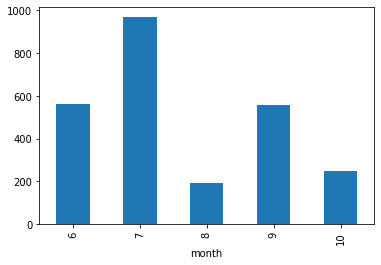

In [10]:
df1 = df[df["sentiment"] == "negative"].groupby("month")["sentiment"].count()
print(df1)
df1.plot.bar(x="Month", y="Sentiment")

**Month 7(July 21) has the biggest number of negative tweets**

query_name
Alpha Bank          47
Ethniki Trapeza    531
Eurobank            70
Piraeus Bank       321
Name: sentiment, dtype: int64


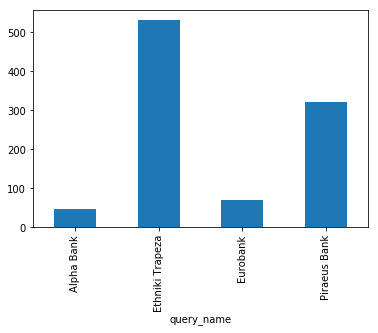

In [ ]:
df2 = df[(df["month"] == 7) & (df["sentiment"] == "negative")].groupby("query_name")["sentiment"].count()
print(df2)
df2.plot.bar()

**Ethniki trapeza has for July the most negative sentiment**

In [ ]:
# We select the columns that may could be correlated. The other columns are enumerated
df3 = df[["impact", "query_name", "sentiment"]]

In [ ]:
df3['query_name_code'] = pd.factorize(df['query_name'])[0] + 1
df3['sentiment_code'] = pd.factorize(df['sentiment'])[0] + 1
df3.head()

C:\Users\uogss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\uogss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,impact,query_name,sentiment,query_name_code,sentiment_code
0,0.20,Eurobank,negative,1,1
1,0.10,Piraeus Bank,neutral,2,2
2,0.07,Piraeus Bank,negative,2,1
3,0.30,Alpha Bank,neutral,3,2
4,0.13,Ethniki Trapeza,negative,4,1


*Above i converted the categorical columns to numerical in order to apply the correlation method*

In [ ]:
df3.corr()

,impact,query_name_code,sentiment_code
impact,1.000000,-0.080782,0.324342
query_name_code,-0.080782,1.000000,-0.075441
sentiment_code,0.324342,-0.075441,1.000000


*Does not seem that we have correlations betwwen different columns*

Text(0.5, 1.0, 'Correlation Heatmap')

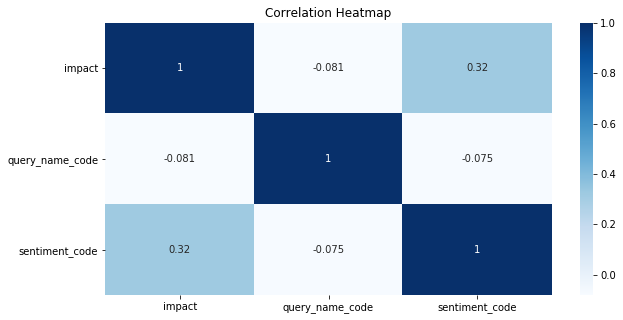

In [ ]:
# Plot the correlation table
fig = plt.figure(figsize=(10,5))
sns.heatmap(df3.corr(method='pearson'), annot = True, cmap="Blues")
plt.title("Correlation Heatmap")

## Text Preprocessing

In [11]:
# filter text column
df_text = df['text']
df_text.head()

0    RT @re_aiiii: H eurobank έβγαλε διαφήμιση ότι ...
1    RT @GTrapeziotis: Κανονικά ο Βαξεβάνης θα πρέπ...
2    ΔΕΛΤΙΟ ΤΥΠΟΥ Συνάντηση μελών της ΚΟ του ΜέΡΑ25...
3    Στις τράπεζες, οριακή άνοδο καταγράφουν Πειραι...
4    RT @spigaro: Πρόεδρος στην Εθνική Τράπεζα ο Γκ...
Name: text, dtype: object

*Below i am going to use regular expressions in order to remove special characters, mentions, hashtags and urls*

In [12]:
remove_RT = lambda x: re.sub(r'(http\S+)|RT|([A-Za-z0-9]+)|(\w+:\/\/\S+)|([()\"#/;@:<>{}`+=~|.!?_,])', '', str(x))
df_text_clean = df_text.apply(remove_RT)

In [ ]:
df_text_clean.head(20)

*Remove greek stopwords*

In [ ]:
import nltk  
nltk.download('stopwords')
from nltk.corpus import stopwords
greek_stopwords = set(stopwords.words('greek'))

In [19]:
more_words = ['του', 'της', 'τη', 'από', 'στις', 'το', 'με', 'μου', 'μας', 'σας', 'στην', 'είναι', 'και', 'ότι', 'στις','τράπεζα','τράπεζας','ενώ']
greek_stopwords.update(more_words)

In [20]:
remove_words = lambda x: ' '.join([word for word in x.split() if word not in greek_stopwords])
df_text_clean_rs = df_text_clean.apply(remove_words)

In [21]:
# This is the final preprocessd corpus for the tfidf process
df_text_clean_rs.head()

0    έβγαλε διαφήμιση ανησυχεί δημογραφικό Κάντε πα...
1    Κανονικά Βαξεβάνης πρέπει κάνει δωρεάν συνδρομ...
2    ΔΕΛΤΙΟ ΤΥΠΟΥ Συνάντηση μελών ΚΟ ΜέΡΑ ΣΕΥΤΠΕ Το...
3    Στις τράπεζες οριακή άνοδο καταγράφουν Πειραιώ...
4    Πρόεδρος Εθνική Τράπεζα Γκίκας Χαρδούβελης οπο...
Name: text, dtype: object

*We calculate TFidf for every term. So with this approach we can create numeric feature vectors from the text.*

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(df_text_clean_rs).toarray()

In [35]:
# create a list with all the tfidf weights
weights = np.asarray(x.mean(axis=0)).ravel().tolist()

In [36]:
words_list = [word for line in df_text_clean_rs for word in line.split()]

In [37]:
# apply the tfidf value to the corresponding term
weights_df = pd.DataFrame({'term': v.get_feature_names_out(), 'weight': weights})

**Below you can see the top20 words based on tfidf score**

In [38]:
# Sort the top 20 keywords
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
6537,πειραιώς,0.035440
2691,εθνική,0.030380
3648,ευρώ,0.026764
8433,τράπεζα,0.024493
8441,τράπεζες,0.022039
7749,στις,0.020820
8438,τράπεζας,0.017634
7239,πρόεδρος,0.014718
8421,τους,0.014502
2692,εθνικής,0.014007


## Word Cloud

In [39]:
allwords = ' '.join( [twts for twts in df_text_clean_rs] )

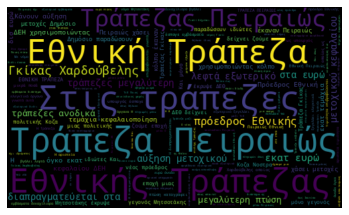

In [40]:
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

*3-grams based on TF-IDF score*

In [ ]:
# Getting trigrams 
vectorizer = CountVectorizer(ngram_range = (3,3))
X1 = vectorizer.fit_transform(df_text_clean_rs) 
features = (vectorizer.get_feature_names_out())
#print("\n\nFeatures : \n", features)
#print("\n\nX1 : \n", X1.toarray())

In [ ]:
# Applying TFIDF
vectorizer = TfidfVectorizer(ngram_range = (3,3))
X2 = vectorizer.fit_transform(df_text_clean_rs)
scores = (X2.toarray())
nscores = preprocessing.normalize(scores)
print("\n\nScores : \n", nscores)

In [ ]:
sums = X2.mean(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(10))

*2-grams based on TF-IDF score*

In [ ]:
# Getting bigrams 
vectorizer = CountVectorizer(ngram_range = (2,2))
X1 = vectorizer.fit_transform(df_text_clean_rs) 
features = (vectorizer.get_feature_names_out())
#print("\n\nFeatures : \n", features)
#print("\n\nX1 : \n", X1.toarray())

In [ ]:
# Applying TFIDF
vectorizer = TfidfVectorizer(ngram_range = (2,2))
X2 = vectorizer.fit_transform(df_text_clean_rs)
scores = (X2.toarray())
nscores = preprocessing.normalize(scores)
print("\n\nScores : \n", nscores)

In [ ]:
sums = X2.mean(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(10))

# Modelling - Sentiment Classification

## Random Forest classifier

In [49]:
# The vector with the sentiment. Based on these values we will do the classification
y = df.iloc[:, 5].values

In [50]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [51]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [52]:
predictions = text_classifier.predict(X_test)
 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

[[181  15  13  12]
 [ 14 247  13   7]
 [ 49   6 102  14]
 [ 32   5   6 284]]
                 precision    recall  f1-score   support

     Alpha Bank       0.66      0.82      0.73       221
Ethniki Trapeza       0.90      0.88      0.89       281
       Eurobank       0.76      0.60      0.67       171
   Piraeus Bank       0.90      0.87      0.88       327

       accuracy                           0.81      1000
      macro avg       0.80      0.79      0.79      1000
   weighted avg       0.82      0.81      0.81      1000

0.814


**The accuracy score is 0.895**

## Logistic Regression

In [ ]:
import pickle 
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5,
                          scoring='accuracy',
                          random_state=0,
                          n_jobs=1,
                          verbose=1,
                          max_iter=300).fit(X_train, y_train)
saved_model = open('saved_model.csv', 'wb')
pickle.dump(clf, saved_model)
saved_model.close()

In [ ]:
filename = 'saved_model.csv'
saved_clf = pickle.load(open(filename, 'rb'))

In [ ]:
saved_clf.score(X_test, y_test)

C:\Users\uogss\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1926: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


0.926

**The accuracy score is 0.926**

## Support Vector Classifier

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.92      0.95      0.93       516
     neutral       0.93      0.91      0.92       471
    positive       0.80      0.62      0.70        13

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.88      0.82      0.85      1000
weighted avg       0.93      0.93      0.93      1000

